# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [2]:
study_url= 'http://bit.ly/w-data'
study = pd.read_csv(study_url)

In [3]:
study.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
study.shape

(25, 2)

In [5]:
study.columns

Index(['Hours', 'Scores'], dtype='object')

In [6]:
study.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
study.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
study.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<AxesSubplot:>

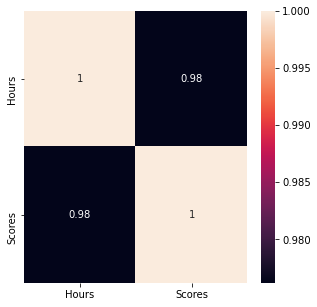

In [9]:
plt.figure(figsize= (5, 5))
sns.heatmap(study.corr(), annot = True )

# Checking for Null Values

In [10]:
study.isna()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


# Data Visualization

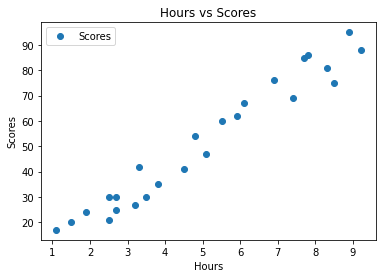

In [11]:
study.plot(x='Hours', y='Scores', style='o')
plt.title("Hours vs Scores")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

<AxesSubplot:ylabel='Scores'>

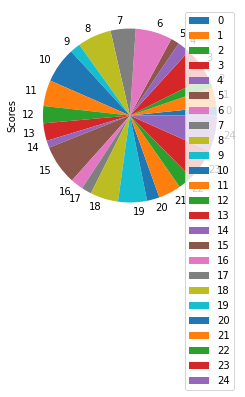

In [12]:
study.plot.pie(x="Hours", y="Scores")

<AxesSubplot:xlabel='Hours'>

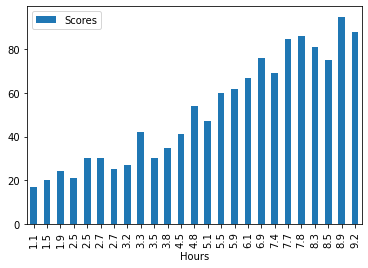

In [13]:
study.sort_values(["Hours"], axis=0, ascending=[True], inplace=True)
study.plot.bar(x="Hours", y="Scores")

# Preparing the data

In [14]:
x = np.asanyarray(study['Hours'])
y = np.asanyarray(study['Scores'])

# Splitting the Data

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=0)

# Training Algorithm

In [16]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [17]:
lr.fit(np.array(x_train).reshape(-1,1), np.array(y_train).reshape(-1,1))

LinearRegression()

In [18]:
print('Coefficients: ', lr.coef_)
print("Intercept: ", lr.intercept_)

Coefficients:  [[9.66210145]]
Intercept:  [2.53004059]


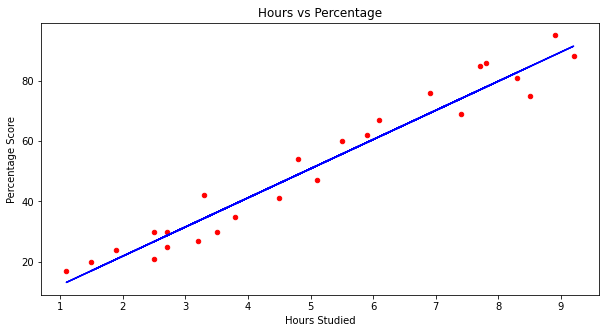

In [19]:
study.plot(kind='scatter', x='Hours', y='Scores', figsize=(10,5), color='r')
plt.plot(x_train, lr.coef_[0]*x_train + lr.intercept_, color='b')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

# Predicting the scores

In [20]:
predictions=lr.predict(np.array(x_test).reshape(-1,1))
predictions

array([[28.6177145 ],
       [20.88803334],
       [76.92822173],
       [61.46885942],
       [46.0094971 ]])

# Comparing predicted data with actual data

In [21]:
df = pd.DataFrame(np.c_[x_test,y_test,predictions], columns=['Study_hours', 'Actual marks', 'Predicted marks'])
df

,Study_hours,Actual marks,Predicted marks
0,2.7,30.0,28.617714
1,1.9,24.0,20.888033
2,7.7,85.0,76.928222
3,6.1,67.0,61.468859
4,4.5,41.0,46.009497


# Prediction with custom input

In [22]:
hours=[9.25]
pred=lr.predict([hours])
print("NO. of Hours = {}".format(hours))
print("Predicted scores = {}".format(pred[0]))

NO. of Hours = [9.25]
Predicted scores = [91.90447898]


# Evaluating the Model

In [23]:
from sklearn import metrics
print("Mean Absolute error:", metrics.mean_absolute_error(y_test,predictions))
print("Mean Squared error:", metrics.mean_squared_error(y_test,predictions))
print("Root Mean Squared error:", np.sqrt(metrics.mean_squared_error(y_test,predictions)))


Mean Absolute error: 4.621333622532769
Mean Squared error: 26.487446288873382
Root Mean Squared error: 5.14659560183947
